In [1]:
import pymc3 as pm
import numpy as np
import pandas as pd
from theano import shared
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az
from scipy.stats import pearsonr

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
az.style.use('arviz-darkgrid')

In [3]:
df = pd.read_csv('iris.csv')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df_l = df['petal_length']
df_w = df['petal_width']

Text(0, 0.5, 'Petal_Width')

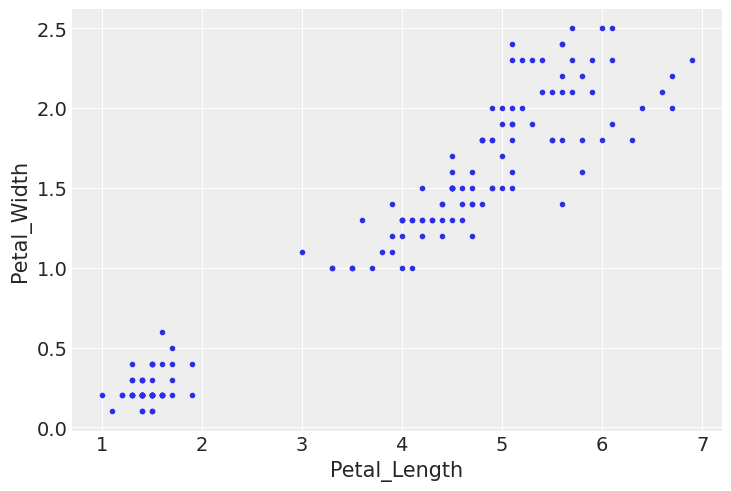

In [6]:
plt.plot(df_l,df_w,'C0.')
plt.xlabel('Petal_Length')
plt.ylabel('Petal_Width')

In [7]:
with pm.Model() as model_normal:
    # priors
    α = pm.Normal('α',mu=0,sd=10)
    β = pm.Normal('β',mu=0,sd=10)
    σ = pm.HalfNormal('σ',sd=1)
    # likelihood
    y_obs = pm.Normal('y_obs',mu=α + (β*df_l) , sd=σ,observed=df_w)
    #inference
    trace_normal = pm.sample(1000,tune=1000)
    
with pm.Model() as model_t:
    # priors
    α = pm.Normal('α',mu=0,sd=10)
    β = pm.Normal('β',mu=0,sd=10)
    σ = pm.HalfNormal('σ',sd=1)
    ν = pm.Exponential('ν',lam=1/30)
    # likelihood
    y_obs = pm.StudentT('y_obs',nu=ν,mu=α+(β*df_l),sd=σ,observed=df_w)
    # inference
    trace_t = pm.sample(1000,tune=1000)

E:\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, β, α]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 37 seconds.
E:\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ν, σ, β, α]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 41 seconds.


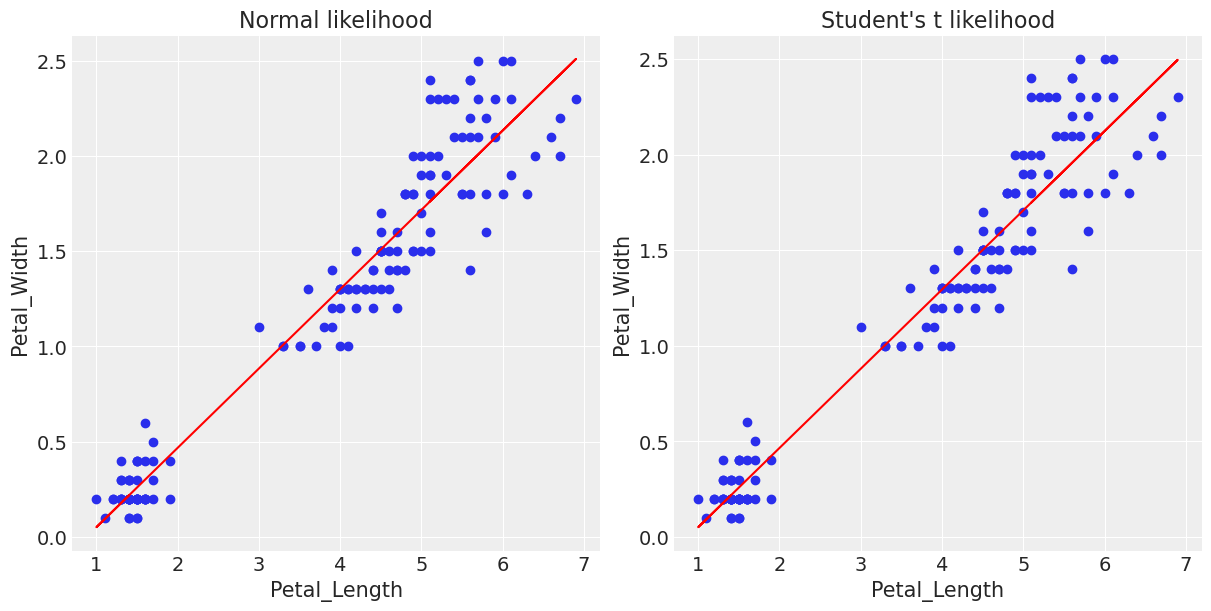

In [8]:
# Plot the results
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# normal likelihood
axs[0].scatter(df_l, df_w)
axs[0].plot(df_l, np.mean(trace_normal['α']) + np.mean(trace_normal['β'])*df_l, color='red')
axs[0].set_xlabel('Petal_Length')
axs[0].set_ylabel('Petal_Width')
axs[0].set_title('Normal likelihood')

# Student's t likelihood
axs[1].scatter(df_l, df_w)
axs[1].plot(df_l, np.mean(trace_t['α']) + np.mean(trace_t['β'])*df_l, color='red')
axs[1].set_xlabel('Petal_Length')
axs[1].set_ylabel('Petal_Width')
axs[1].set_title('Student\'s t likelihood')

plt.show()

In [9]:
# in α + βX, β is the slope and α is the intercept 
pm.summary(trace_normal,var_names=['β','α'])

E:\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
β,0.416,0.010,0.396,0.433,0.000,0.000,879.0,783.0,1.0
α,-0.364,0.042,-0.441,-0.284,0.001,0.001,860.0,790.0,1.0


In [10]:
pm.summary(trace_t,var_names=['β','α'])

E:\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
β,0.414,0.01,0.396,0.434,0.000,0.000,705.0,783.0,1.0
α,-0.364,0.04,-0.436,-0.287,0.002,0.001,716.0,845.0,1.0


From the results plotted of Likelihood's from Normal and Student's T distributions, we can see that both distributions are exactly the same. They yield the same results for the slope which is at a mean of 0.414 , and the intercept which is at a mean of -0.361. Hence both are robust enough. Therefore, in this Assignment we will continue using the normal distribution

[-0.3746634  -0.38014606 -0.36610608 ... -0.36337385 -0.36337385
 -0.35201902]


E:\anaconda3\envs\pm3bap\lib\site-packages\arviz\stats\stats.py:456: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(
E:\anaconda3\envs\pm3bap\lib\site-packages\arviz\stats\stats.py:456: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


Text(0, 0.5, 'sepal_width')

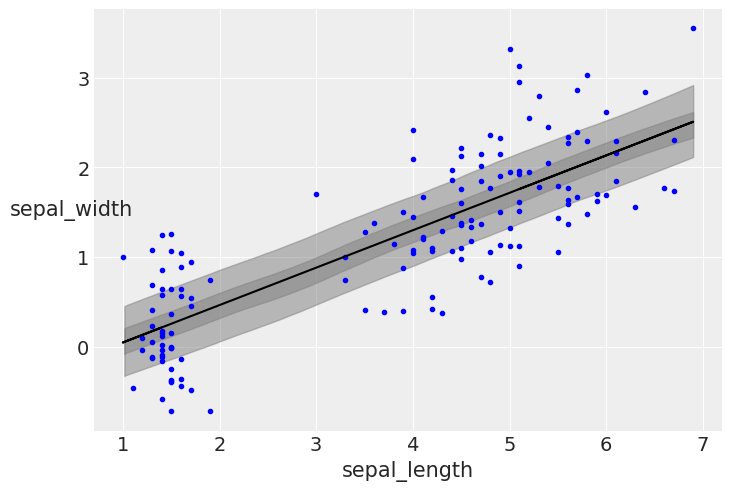

In [11]:
eps_real = np.random.normal(0, 0.5, size=150)
print(trace_normal['α'])

x=df_l
y=df_w + eps_real

ppc = pm.sample_posterior_predictive(trace_normal, samples=2000, model=model_normal)

alpha_m = np.mean(trace_normal['α'])
beta_m = np.mean(trace_normal['β'])

plt.plot(x, y, 'b.')
plt.plot(x, alpha_m + beta_m * x, c='k',
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')

az.plot_hdi(x, ppc['y_obs'], hdi_prob=0.5, color='gray')
az.plot_hdi(x, ppc['y_obs'], color='gray')

plt.xlabel('sepal_length')
plt.ylabel('sepal_width', rotation=0)

E:\anaconda3\envs\pm3bap\lib\site-packages\arviz\stats\stats.py:456: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(
E:\anaconda3\envs\pm3bap\lib\site-packages\arviz\stats\stats.py:456: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


Text(0, 0.5, 'sepal_width')

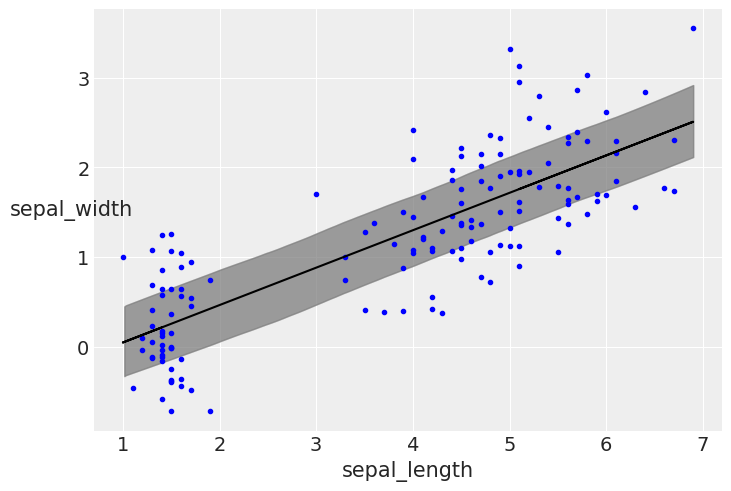

In [12]:
plt.plot(x, y, 'b.')
plt.plot(x, alpha_m + beta_m * x, c='k',
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')

az.plot_hdi(x, ppc['y_obs'], hdi_prob=0.94, color='gray')
az.plot_hdi(x, ppc['y_obs'], color='gray')

plt.xlabel('sepal_length')
plt.ylabel('sepal_width', rotation=0)

E:\anaconda3\envs\pm3bap\lib\site-packages\arviz\plots\pairplot.py:185: UserWarning: plot_kwargs will be deprecated. Please use scatter_kwargs, kde_kwargs and/or hexbin_kwargs
  warnings.warn(
E:\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<AxesSubplot: xlabel='α', ylabel='β'>

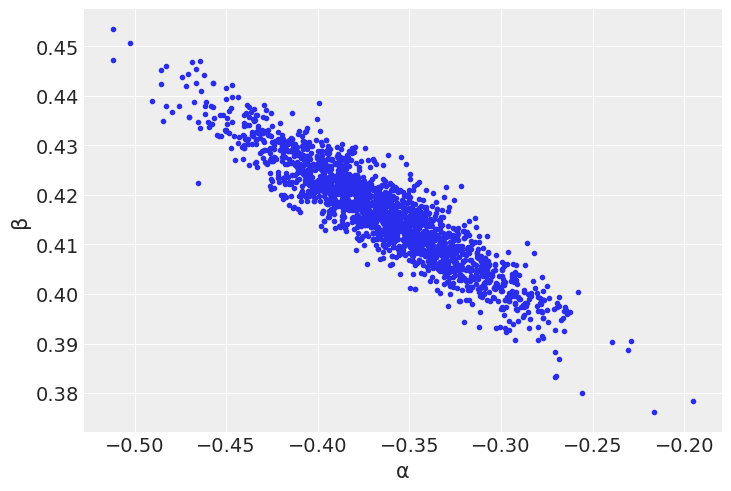

In [13]:
az.plot_pair(trace_normal, var_names=['α', 'β'], plot_kwargs={'alpha': 0.1})

C:\Users\Mahad Ahmed\AppData\Local\Temp\ipykernel_11168\4078452175.py:2: DeprecationWarning: The function `autocorrplot` from PyMC3 is just an alias for `plot_autocorr` from ArviZ. Please switch to `pymc3.plot_autocorr` or `arviz.plot_autocorr`.
  pm.autocorrplot(trace_normal, var_names=['α', 'β'])


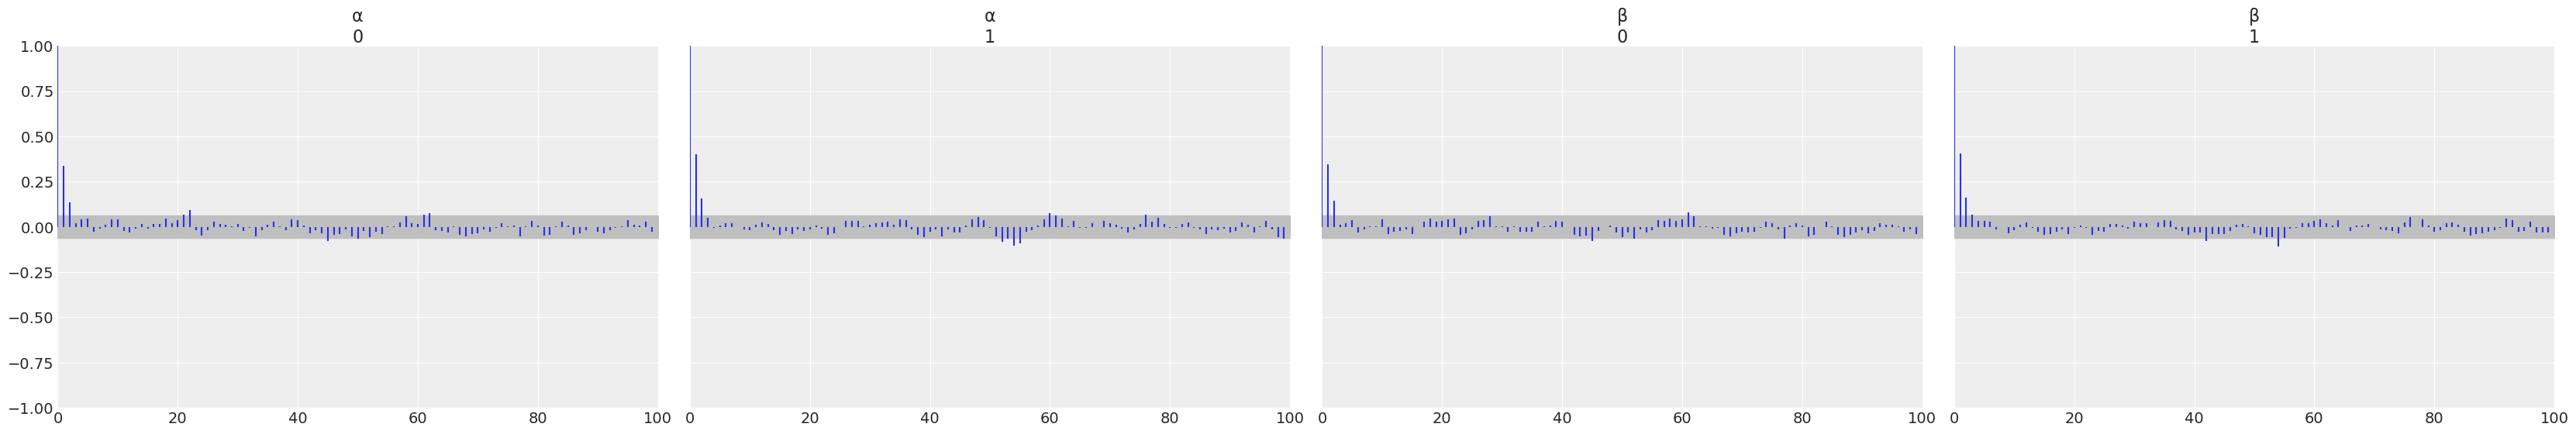

In [14]:
# Checking the auto correlations
pm.autocorrplot(trace_normal, var_names=['α', 'β'])
plt.show()

In [15]:
# Calculating the pearson correlation
r, p = pearsonr(trace_normal['α'], trace_normal['β'])
print('Pearson correlation coefficient:', r)
print('p-value:', p)

Pearson correlation coefficient: -0.9182802838470233
p-value: 0.0


A high correlation between alpha and beta exists as we can see that the value of pearson correlation coefficient is -0.9 which is close to -1 and so it is a strong negative correlation. We can also see this from the auto correlation plot which forms like a sinosidal wave for the parameters showing that the chain is not mixing well and the variables are not independant at certain lags.

<!-- # Removing the high auto correlation between alpha and beta -->
We can thin the chain which retains every n'th sample for an interval n. This can reduce the number of highly correlated samples in the chain but this will decrease the precision of the posterior as we are using less samples.
We can also try to modify the model by adding additional variables or using imformed priors to help improve the mixing of the chain